Exploring trends of COVID-19 in MD

https://opendata.maryland.gov/Health-and-Human-Services/MD-COVID-19-MASTER-Case-Tracker/mgd3-qk8t

Information retrieved from Maryland.gov

Database has information from dates March 4th to October 21st (most recent available data)

Last updated October 21, 2020

In [ ]:
# importing modules
import csv
import pandas as pd
import matplotlib.pyplot as plt

# loading the COVID-19 csv file
data = pd.read_csv("MD_COVID-19_-_MASTER_Case_Tracker.csv")

I started by looking at the basics of the COVID-19 dataset

In [ ]:
# preview the data
print(data.head())
print(data.tail())

  Filter              ReportDate  ...  pDeathOther  pDeathNotAvail
0    NaN  03/04/2020 03:00:00 PM  ...          NaN             NaN
1    NaN  03/05/2020 03:00:00 PM  ...          NaN             NaN
2    NaN  03/06/2020 03:00:00 PM  ...          NaN             NaN
3    NaN  03/07/2020 03:00:00 PM  ...          NaN             NaN
4    NaN  03/08/2020 02:00:00 PM  ...          NaN             NaN

[5 rows x 159 columns]
    Filter              ReportDate  ...  pDeathOther  pDeathNotAvail
227    NaN  10/17/2020 02:00:00 PM  ...          0.0             0.0
228    NaN  10/18/2020 02:00:00 PM  ...          0.0             1.0
229    NaN  10/19/2020 02:00:00 PM  ...          0.0             1.0
230    NaN  10/20/2020 02:00:00 PM  ...          0.0             1.0
231      d  10/21/2020 02:00:00 PM  ...          0.0             0.0

[5 rows x 159 columns]


In [ ]:
# preview the shape of the data
print("Rows, Columns:" , data.shape)

Rows, Columns: (232, 159)


In [ ]:
# get a little more information on the data
print(data.sample(10))

    Filter              ReportDate  ...  pDeathOther  pDeathNotAvail
25     NaN  03/29/2020 02:00:00 PM  ...          NaN             NaN
150    NaN  08/01/2020 02:00:00 PM  ...          0.0             0.0
231      d  10/21/2020 02:00:00 PM  ...          0.0             0.0
82     NaN  05/25/2020 02:00:00 PM  ...          0.0             6.0
0      NaN  03/04/2020 03:00:00 PM  ...          NaN             NaN
203    NaN  09/23/2020 02:00:00 PM  ...          0.0             0.0
33     NaN  04/06/2020 02:00:00 PM  ...          NaN             NaN
149    NaN  07/31/2020 02:00:00 PM  ...          0.0             0.0
171    NaN  08/22/2020 02:00:00 PM  ...          0.0             3.0
179    NaN  08/30/2020 02:00:00 PM  ...          0.0             3.0

[10 rows x 159 columns]


The original report date given is written like MM/DD/YYYY with HH:MM:SS so it makes the chart hard to see how much time has passed

To remedy this I created a new column that only includes the MM/DD in hope it will be easier to read on the chart.

In [ ]:
# create a new column in dataframe to include shorter date
data['ShortDate'] = data['ReportDate'].astype(str).str.slice(start = 0, stop = 5)
print(data['ShortDate']) 

0      03/04
1      03/05
2      03/06
3      03/07
4      03/08
       ...  
227    10/17
228    10/18
229    10/19
230    10/20
231    10/21
Name: ShortDate, Length: 232, dtype: object


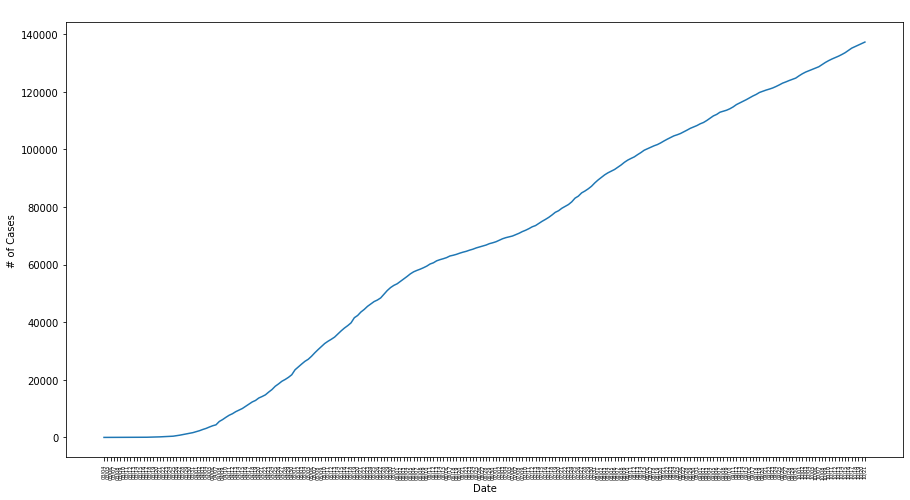

In [ ]:
# get a rough look of the COVID-19 cases
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

plt.plot(data["ShortDate"],data["TotalCases"])
plt.title('COVID-19 Cases',color='white')
plt.xlabel('Date')
plt.xticks(rotation = 90,fontsize = 5)
plt.ylabel('# of Cases')
plt.show()

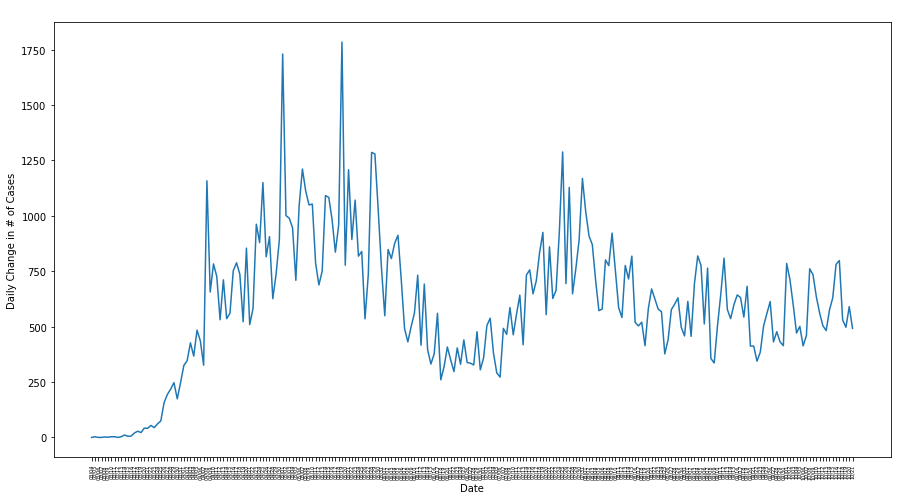

In [ ]:
# plot the change in number of COVID-19 daily cases
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

plt.plot(data["ShortDate"],data["CaseDelta"])
plt.title('COVID-19 Daily Change in Cases',color='white')
plt.xlabel('Date')
plt.xticks(rotation = 90,fontsize = 5)
plt.ylabel('Daily Change in # of Cases')
plt.show()

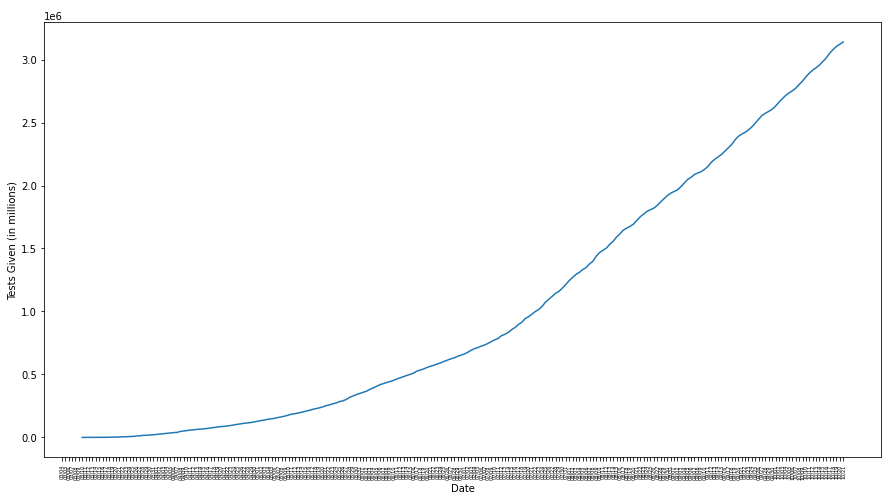

In [ ]:
# plot the total number of tests for COVID-19 given
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

plt.plot(data["ShortDate"],data["TotalTests"])
plt.title('COVID-19 Tests Given',color='white')
plt.xlabel('Date')
plt.xticks(rotation = 90,fontsize = 5)
plt.ylabel('Tests Given (in millions)')
plt.show()

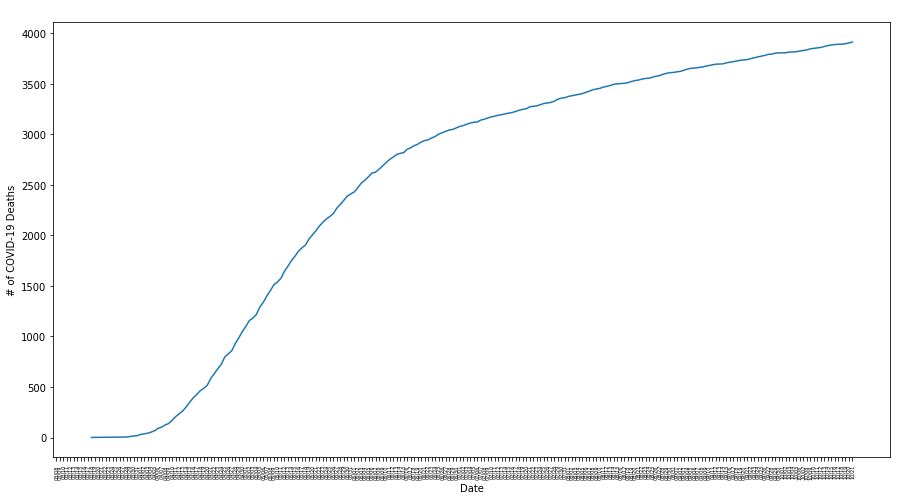

In [ ]:
# plot the number of COVID-19 deaths
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

plt.plot(data["ShortDate"],data["deaths"])
plt.title('COVID-19 Deaths in MD',color='white')
plt.xlabel('Date')
plt.xticks(rotation = 90,fontsize = 5)
plt.ylabel('# of COVID-19 Deaths')
plt.show()

The charts are slightly easier to read, but more importantly gives me a better idea of what the data looks like.  Now I need to figure out what variables to investigate.

It makes sense that as testing for COVID-19 ramped up, more people tested postive for COVID-19.

Let's start by seeing what counties in MD were hit the hardest with COVID-19.


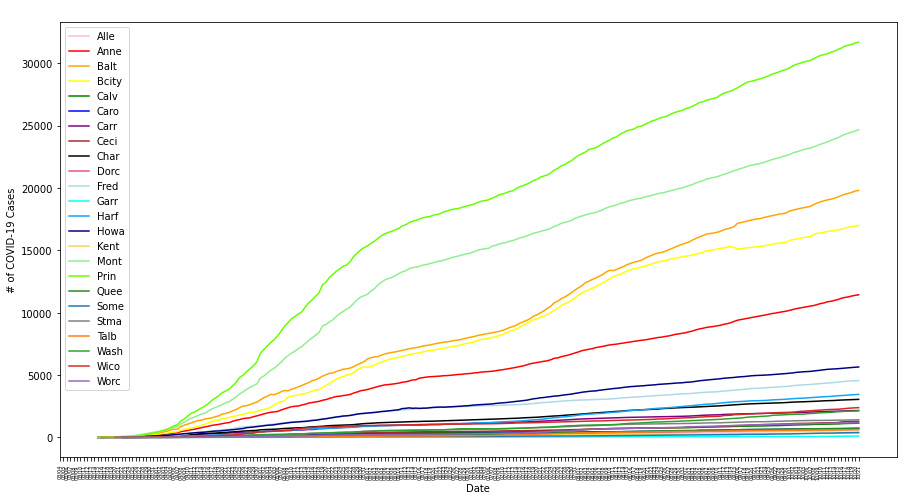

In [ ]:
# plot a comparison of COVID-19 cases in each county
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
x = data["ShortDate"]
y1 = data["ALLE"]
y2 = data["ANNE"]
y3 = data["BALT"]
y4 = data["BCITY"]
y5 = data["CALV"]
y6 = data["CARO"]
y7 = data["CARR"]
y8 = data["CECI"]
y9 = data["CHAR"]
y10 = data["DORC"]
y11 = data["FRED"]
y12 = data["GARR"]
y13 = data["HARF"]
y14 = data["HOWA"]
y15 = data["KENT"]
y16 = data["MONT"]
y17 = data["PRIN"]
y18 = data["QUEE"]
y19 = data["SOME"]
y20 = data["STMA"]
y21 = data["TALB"]
y22 = data["WASH"]
y23 = data["WICO"]
y24 = data["WORC"]

ax.plot(x,y1, label="Alle", color='pink')
ax.plot(x,y2, label='Anne', color='red')
ax.plot(x,y3, label='Balt', color='orange')
ax.plot(x,y4, label='Bcity', color='yellow')
ax.plot(x,y5, label='Calv', color='green')
ax.plot(x,y6, label='Caro', color='blue')
ax.plot(x,y7, label='Carr', color='purple')
ax.plot(x,y8, label='Ceci', color='brown')
ax.plot(x,y9, label='Char', color='black')
ax.plot(x,y10, label='Dorc',color='#e75480')
ax.plot(x,y11, label='Fred', color='#add8e6')
ax.plot(x,y12, label='Garr', color='#00FFFF')
ax.plot(x,y13, label='Harf', color='#10A5F5')
ax.plot(x,y14, label='Howa', color='#000080')
ax.plot(x,y15, label='Kent', color='#FDD451')
ax.plot(x,y16, label='Mont', color='#90ee90')
ax.plot(x,y17, label='Prin', color='#66ff00')
ax.plot(x,y18, label='Quee', color='#228B22')
ax.plot(x,y19, label='Some')
ax.plot(x,y20, label='Stma', color='gray')
ax.plot(x,y21, label='Talb')
ax.plot(x,y22, label='Wash')
ax.plot(x,y23, label='Wico')
ax.plot(x,y24, label='Worc')
ax.legend()
plt.title('COVID-19 Cases in Each County',color='white')
plt.xlabel('Date')
plt.xticks(rotation = 90,fontsize = 5)
plt.ylabel('# of COVID-19 Cases')
plt.show()

The chart can be slighly difficult to read, but it appears that Prince George's County, Montgomery County, Baltimore and Baltimore City are the majority of the COVID cases for MD.


I think it would a better representation to see the percentage of COVID-19 cases per county and overall the state of MD.  (I need to find a good dataset to get that information of population of county and population of MD)

Only other question to be examined is the age groups most effected by COVID-19.  Similar charts as above will be analyzed.